<a href="https://colab.research.google.com/github/hundareshivani/color-identification-in-images/blob/main/color%20identification%20in%20images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GRIP @ THE SPARKS FOUNDATION**
### **TASK 2: Color Identification in Images**


**Author: SHIVANI  HUNDARE**

### **READING  LIBRARIES**

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

### **IMPORTING IMAGE**

In [2]:
from google.colab import files


In [3]:
uploaded = files.upload()


Saving viceroy-bali-main-pool-evening.jpg to viceroy-bali-main-pool-evening.jpg


The type of this input is <class 'numpy.ndarray'>
Shape: (683, 1024, 3)


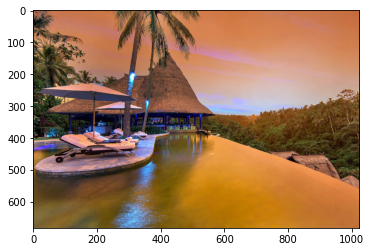

In [4]:
imgName = 'viceroy-bali-main-pool-evening.jpg'
image = cv2.imread(imgName)
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

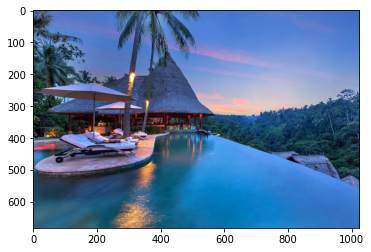

In [5]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

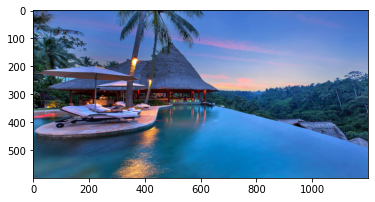

In [6]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

## **COLOR IDENTIFICATION**

FIRST, WE WILL DEFINE A FUNCTION THAT CAN GIVE US THE HEX VALUES OF OUR THE COLORS THAT WE WILL IDENTIFY

In [10]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))



## **Clusters of colors** are identified and arranged in the correct order.
## So we plot the colors as a **PIE CHART**

In [7]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [8]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([ 71.4915964 , 122.64135141, 202.62041363]),
 array([30.87742072, 56.93982151, 74.02257575]),
 array([212.69210603, 190.67200699, 196.63093504]),
 array([ 80.9547393 , 101.46034002, 141.05788366]),
 array([151.60700087, 165.20952337, 214.18480099]),
 array([ 16.60656239, 123.74978346, 192.77826464]),
 array([192.82469136, 131.02901235, 100.40411523]),
 array([25.30714013, 25.49225003, 28.53512895]),
 array([ 37.47574983,  83.78412912, 115.96548756]),
 array([104.4644963 , 135.94689633, 204.04027445]),
 array([85.50219491, 68.23770852, 73.20182177]),
 array([ 68.13633032, 148.58750713, 230.78385862])]

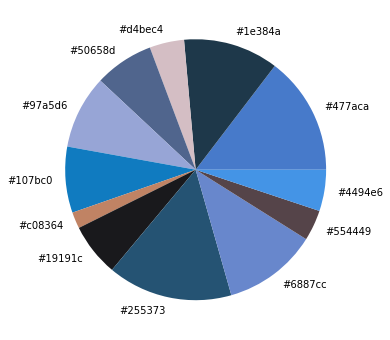

In [11]:
get_colors(get_image(imgName), 12, True)